# Pymaceuticals Inc.
---

### Analysis

Based on the data from the animal study, several observations can be made to examine the performance of Capomulin against other treatment regimens. 

The bar chart displaying the total number of observed mouse timepoints for each drug regimen shows that Capomulin had the highest number of observations with 230, closely followed by Ramicane with 228 observations.

Moreover, when analyzing the tumor volume at the last observed timepoint for each mouse across the four regimens examined (Capomulin, Ramicane, Infubinol, Ceftamin), Capomulin showed the smallest IQR, indicating the least variability in the final tumor volume measurement. Ramicane also exhibited similar quartiles to Capomulin. In contrast, mice treated with Infubinol and Ceftamin displayed much larger quartiles in the final tumor volume, suggesting poorer efficacy in treating SCC compared to Capomulin and Ramicane.

Additionally, the line plot of tumor volume versus time point for Mouse l509 treated with Capomulin demonstrated that Capomulin was effective in reducing the tumor size after 45 days, with the most significant effect observed between days 20 and 35, as the tumor volume generally decreased during this period.

Lastly, a strong positive correlation of 0.84 was observed between mouse weight and average tumor volume for the entire Capomulin regimen, indicating a positive relationship between mouse weight and average tumor volume.

Overall, the study revealed that Capomulin and Ramicane generally had the best results compared to the other drug regimens tested.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_study_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ID = mouse_study_df.loc[mouse_study_df.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_study_df[mouse_study_df["Mouse ID"]=="g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean_df = mouse_study_df[mouse_study_df["Mouse ID"] != "g989"]
mouse_study_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_study_clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_df = mouse_study_clean_df.set_index("Drug Regimen").groupby("Drug Regimen")["Tumor Volume (mm3)"]

tumor_mean = tumor_volume_df.mean()
tumor_median = tumor_volume_df.median()
tumor_var = tumor_volume_df.var()
tumor_std = tumor_volume_df.std()
tumor_sem = tumor_volume_df.sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_volume_df_summary = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                                    "Median Tumor Volume": tumor_median,
                                    "Tumor Volume Variance": tumor_var,
                                    "Tumor Volume Std. Dev.": tumor_std,
                                    "Tumor Volume Std. Err.": tumor_sem})
tumor_volume_df_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_clean_df.set_index("Drug Regimen").groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(['mean', 'median', 'var', 'std', 'sem'])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

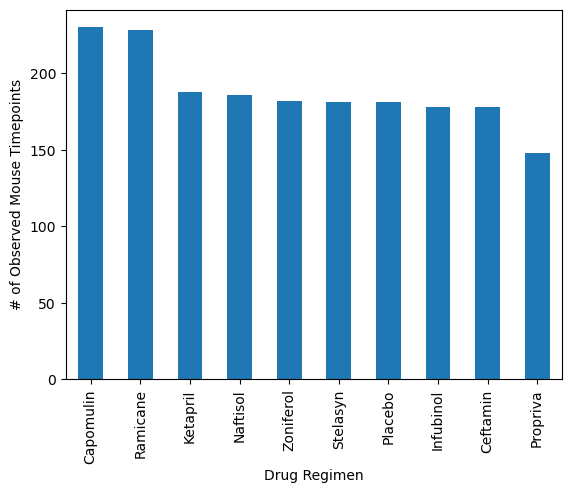

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_count = mouse_study_clean_df["Drug Regimen"].value_counts().sort_values(ascending=False)

count_chart = drug_regimen_count.plot(kind='bar',
                                      xlabel="Drug Regimen",
                                      ylabel="# of Observed Mouse Timepoints")

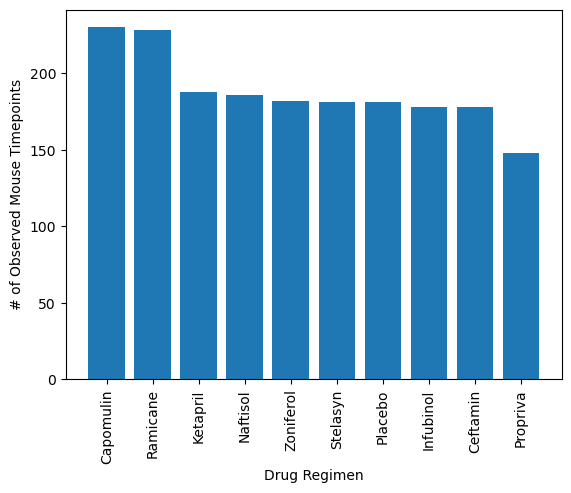

<Figure size 640x480 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimens = drug_regimen_count.index.values
regimens_timepoints = drug_regimen_count.values

plt.bar(regimens, regimens_timepoints, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()
plt.tight_layout()

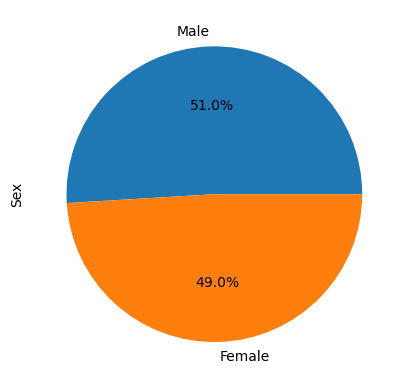

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = mouse_study_clean_df["Sex"].value_counts()

gender_chart = gender_count.plot(kind='pie', autopct="%1.1f%%")

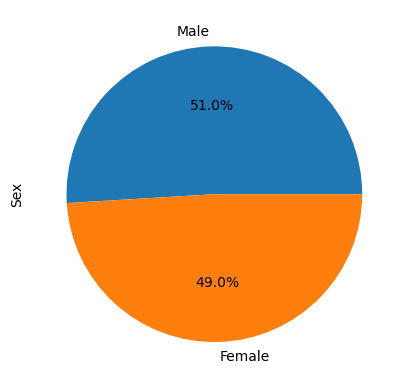

<Figure size 640x480 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_count.values, labels=gender_count.index, autopct="%1.1f%%")
plt.ylabel("Sex")

plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_study_clean_df.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(last_timepoint, mouse_study_clean_df, on=("Mouse ID","Timepoint"),how="left").reset_index(drop=True)
last_timepoint_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    last_tumor = last_timepoint_df[last_timepoint_df["Drug Regimen"]==treatment]["Tumor Volume (mm3)"]
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = last_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    iqr = upperq-lowerq
    print (f"{treatment}'s IQR: {iqr}")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)  
    
    # Determine outliers using upper and lower bounds
    outliers = (last_tumor.loc[(last_tumor < lower_bound) | (last_tumor > upper_bound)])
    if len(outliers) > 0:
        print (f"{treatment}'s potential outliers: {outliers.values}")
    else:
        print (f"{treatment}'s potential outliers: None")

    # Fill list with tumor volume data for plotting
    tumor_vol_data.append(last_tumor)

Capomulin's IQR: 7.781863460000004
Capomulin's potential outliers: None
Ramicane's IQR: 9.098536719999998
Ramicane's potential outliers: None
Infubinol's IQR: 11.477135160000003
Infubinol's potential outliers: [36.3213458]
Ceftamin's IQR: 15.577752179999997
Ceftamin's potential outliers: None


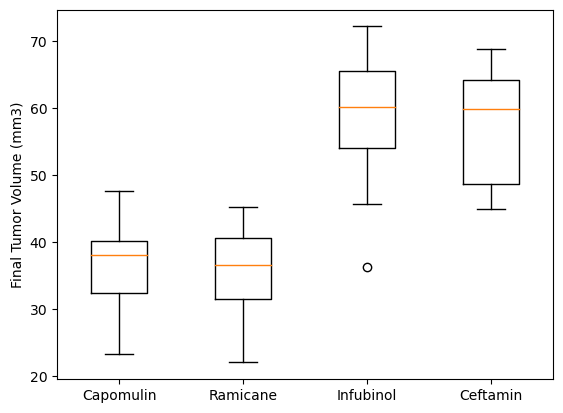

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data)
ax.set_xticklabels(treatments)
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()
plt.show()

## Line and Scatter Plots

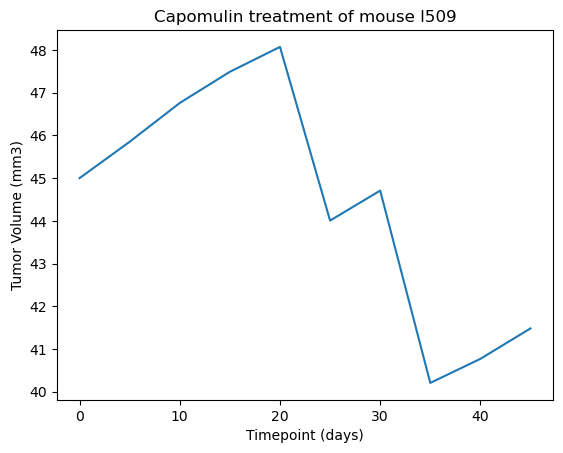

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"

capomulin_df = mouse_study_clean_df[mouse_study_clean_df["Drug Regimen"] == "Capomulin"].set_index("Mouse ID")

timepoint = capomulin_df.loc[mouse_id, "Timepoint"]

tumor_volume = capomulin_df.loc[mouse_id, "Tumor Volume (mm3)"]

capomulin_line_plot = plt.plot(timepoint, tumor_volume)

plt.title("Capomulin treatment of mouse " + mouse_id)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

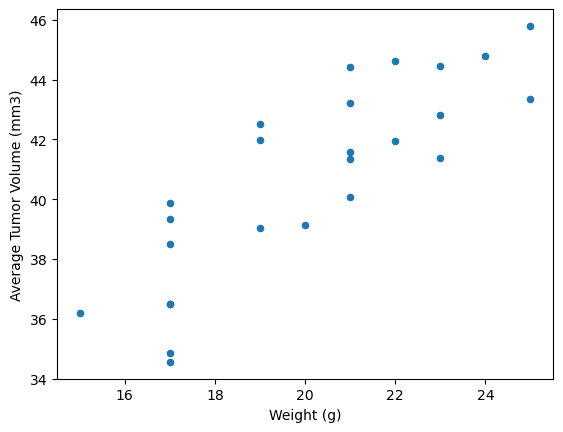

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df_weight = capomulin_df.groupby("Mouse ID").mean("Tumor Volume (mm3)")

capomulin_df_weight.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")

plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


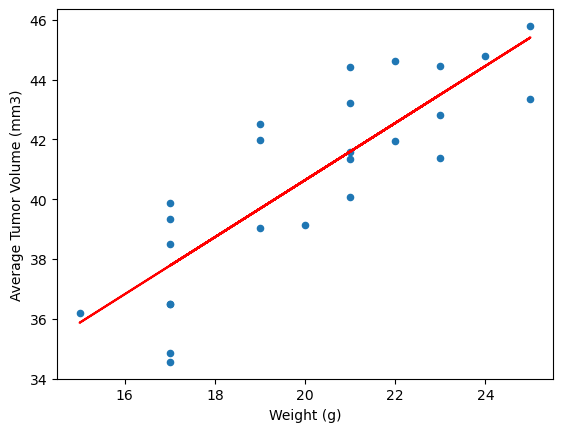

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_df_weight.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")

plt.ylabel("Average Tumor Volume (mm3)")

weight = capomulin_df_weight["Weight (g)"]
avg_tumor = capomulin_df_weight["Tumor Volume (mm3)"]

correlation = st.pearsonr(weight, avg_tumor)

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.show()